In [2]:
import pandas as pd

# 1. Data load karein (encoding zaroori hai error se bachne ke liye)
df = pd.read_csv('zomato.csv', encoding='latin-1')

# 2. Top 3 cuisines nikaalein
# value_counts() gin leta hai ki kaunsa cuisine kitni baar aaya hai
top_cuisines = df['Cuisines'].value_counts().head(3)

# 3. Percentage calculate karein
total_restaurants = len(df)
percentage = (top_cuisines / total_restaurants) * 100

# Results print karein
print("--- Task 1: Top 3 Cuisines ---")
print(top_cuisines)
print("\n--- Percentage of Total Restaurants ---")
print(percentage)

--- Task 1: Top 3 Cuisines ---
Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64

--- Percentage of Total Restaurants ---
Cuisines
North Indian             9.800021
North Indian, Chinese    5.350225
Chinese                  3.706418
Name: count, dtype: float64


In [3]:
# 1. Sabse zyada restaurants wala city
city_counts = df['City'].value_counts()
top_city = city_counts.idxmax()
print(f"City with the most restaurants: {top_city}")

# 2. Har city ki average rating nikaalein
city_avg_rating = df.groupby('City')['Aggregate rating'].mean()
print("\nAverage ratings per city:")
print(city_avg_rating.head()) # Top 5 dikhayega

# 3. Highest average rating wala city
highest_rated_city = city_avg_rating.idxmax()
print(f"\nCity with highest average rating: {highest_rated_city}")

City with the most restaurants: New Delhi

Average ratings per city:
City
Abu Dhabi    4.300000
Agra         3.965000
Ahmedabad    4.161905
Albany       3.555000
Allahabad    3.395000
Name: Aggregate rating, dtype: float64

City with highest average rating: Inner City


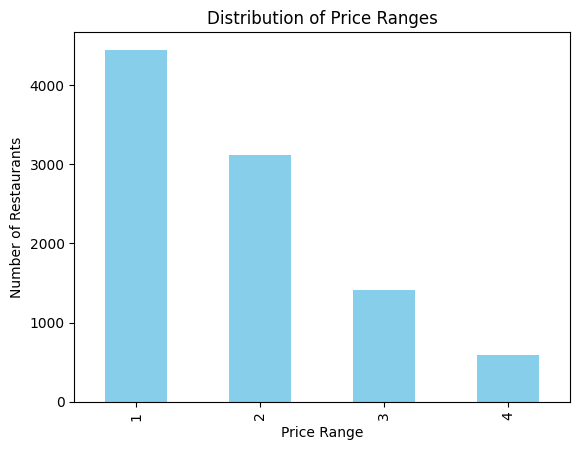

Percentage of restaurants in each price range:
Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


In [4]:
import matplotlib.pyplot as plt

# 1. Price range ka count nikaalein
price_counts = df['Price range'].value_counts().sort_index()

# 2. Bar Chart banayein
price_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Price Ranges')
plt.show()

# 3. Percentage nikaalein
price_percentage = (price_counts / len(df)) * 100
print("Percentage of restaurants in each price range:")
print(price_percentage)

In [5]:
# 1. Percentage of restaurants with online delivery
delivery_counts = df['Has Online delivery'].value_counts()
delivery_percentage = (delivery_counts / len(df)) * 100
print(f"Online Delivery Available: {delivery_percentage['Yes']:.2f}%")

# 2. Compare average ratings
avg_rating_delivery = df.groupby('Has Online delivery')['Aggregate rating'].mean()
print("\nAverage Rating Comparison:")
print(avg_rating_delivery)

Online Delivery Available: 25.66%

Average Rating Comparison:
Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64


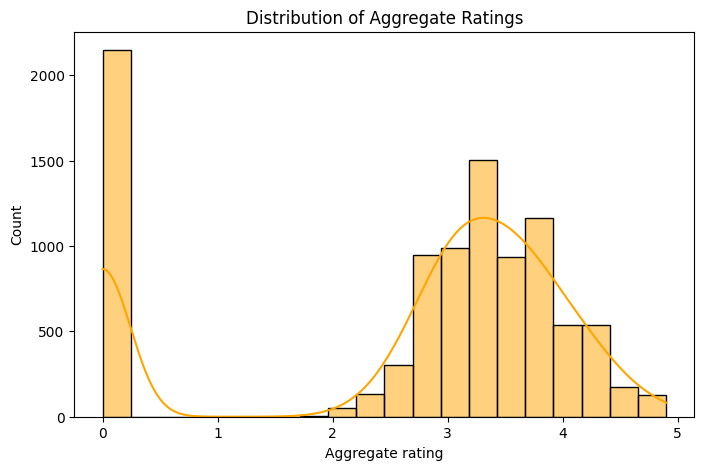

Sabse common rating range: 0.0
Average number of votes per restaurant: 156.91


In [6]:
# 1. Ratings ka distribution plot karein
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['Aggregate rating'], bins=20, kde=True, color='orange')
plt.title('Distribution of Aggregate Ratings')
plt.show()

# 2. Most common rating range
common_rating = df['Aggregate rating'].mode()[0]
print(f"Sabse common rating range: {common_rating}")

# 3. Average number of votes
avg_votes = df['Votes'].mean()
print(f"Average number of votes per restaurant: {avg_votes:.2f}")

In [7]:
# 1. Common Cuisine Combinations
cuisine_combos = df['Cuisines'].value_counts().head(10)
print("Top 10 Cuisine Combinations:")
print(cuisine_combos)

# 2. Kya combination se rating par farq padta hai?
# Hum check karenge ki kitne cuisines serve karne par rating achhi milti hai
df['Cuisine_Count'] = df['Cuisines'].astype(str).apply(lambda x: len(x.split(',')))
rating_by_combo = df.groupby('Cuisine_Count')['Aggregate rating'].mean()

print("\nAverage Rating by Number of Cuisines served:")
print(rating_by_combo)

Top 10 Cuisine Combinations:
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

Average Rating by Number of Cuisines served:
Cuisine_Count
1    2.234999
2    2.693293
3    3.039239
4    3.415582
5    3.510366
6    3.672973
7    3.671429
8    3.421429
Name: Aggregate rating, dtype: float64


In [8]:
import folium
from folium.plugins import MarkerCluster

# 1. Ek basic map banayein (Center location ke liye pehli row use karein)
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)

# 2. Marker Cluster banayein taaki map cluttered na lage
marker_cluster = MarkerCluster().add_to(m)

# 3. Pehle 100 restaurants ko map par dikhayein (Saare dikhayenge toh map hang ho sakta hai)
for idx, row in df.head(100).iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Restaurant Name'],
    ).add_to(marker_cluster)

# Map display karein
m


In [9]:
# 1. Chains identify karein (Jo naam ek se zyada baar aaye)
chains = df['Restaurant Name'].value_counts()
chains_list = chains[chains > 1]

print(f"Total Restaurant Chains found: {len(chains_list)}")

# 2. Top chains by popularity (Total Votes)
chain_popularity = df.groupby('Restaurant Name')['Votes'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Popular Chains (by Votes):")
print(chain_popularity)

Total Restaurant Chains found: 734

Top 10 Popular Chains (by Votes):
Restaurant Name
Barbeque Nation              28142
AB's - Absolute Barbecues    13400
Toit                         10934
Big Chill                    10853
Farzi Cafe                   10098
Truffles                      9682
Chili's                       8156
Hauz Khas Social              7931
Joey's Pizza                  7807
Peter Cat                     7574
Name: Votes, dtype: int64


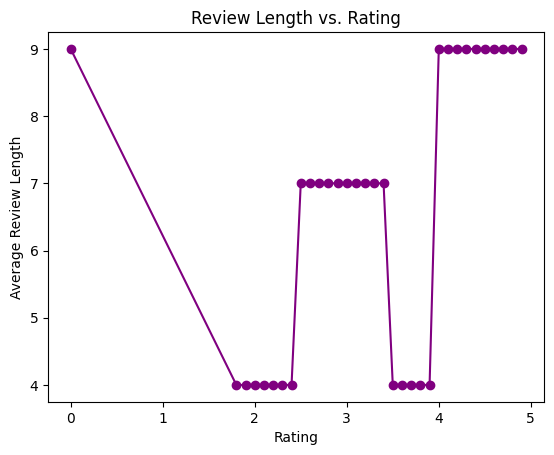

Review Length analysis complete.


In [10]:
# 1. Review length calculate karein
# Hum 'Rating text' column ka istemal karenge kyunki wo review ka ek hissa hai
df['Review_Length'] = df['Rating text'].astype(str).apply(len)

# 2. Relationship between Review Length and Rating
avg_length_by_rating = df.groupby('Aggregate rating')['Review_Length'].mean()

import matplotlib.pyplot as plt
avg_length_by_rating.plot(kind='line', marker='o', color='purple')
plt.title('Review Length vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Average Review Length')
plt.show()

print("Review Length analysis complete.")

Highest Votes: ['Toit' 10934]
Lowest Votes: ['Cantinho da Gula' 0]

Correlation between Votes and Rating: 0.31


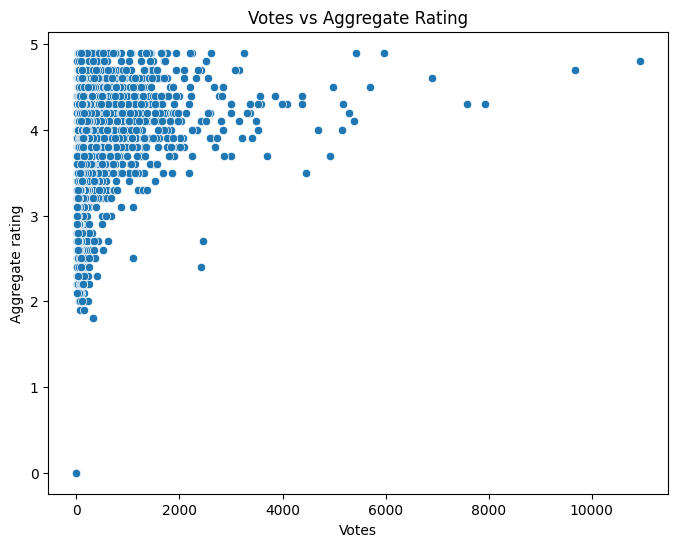

In [11]:
# 1. Highest aur Lowest votes wale restaurants
highest_votes = df.nlargest(1, 'Votes')[['Restaurant Name', 'Votes']]
lowest_votes = df.nsmallest(1, 'Votes')[['Restaurant Name', 'Votes']]

print(f"Highest Votes: {highest_votes.values[0]}")
print(f"Lowest Votes: {lowest_votes.values[0]}")

# 2. Correlation between Votes and Rating
correlation = df['Votes'].corr(df['Aggregate rating'])
print(f"\nCorrelation between Votes and Rating: {correlation:.2f}")

# Visualization: Scatter Plot
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df)
plt.title('Votes vs Aggregate Rating')
plt.show()

Percentage of Online Delivery by Price Range:
Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369

Percentage of Table Booking by Price Range:
Has Table booking         No        Yes
Price range                            
1                  99.977498   0.022502
2                  92.322518   7.677482
3                  54.261364  45.738636
4                  53.242321  46.757679


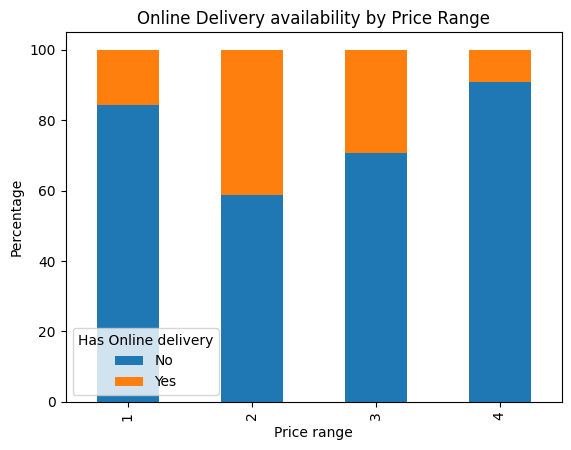

In [12]:
# 1. Price range vs Online Delivery
delivery_by_price = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack() * 100

# 2. Price range vs Table Booking
booking_by_price = df.groupby('Price range')['Has Table booking'].value_counts(normalize=True).unstack() * 100

print("Percentage of Online Delivery by Price Range:")
print(delivery_by_price)

print("\nPercentage of Table Booking by Price Range:")
print(booking_by_price)

# Visualization
delivery_by_price.plot(kind='bar', stacked=True)
plt.title('Online Delivery availability by Price Range')
plt.ylabel('Percentage')
plt.show()